In [4]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data_tugas4/df_ringkasan.csv")
data

,Ringkasan
0,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,..."
1,EKO Yuli Irawan mengucapkan permintaan maafnya...
2,MOTEGI - Marc Marquez girang setelah bisa naik...
3,KLASEMEN sementara perolehan medali Asian Game...
4,HASIL Asian Games 2023 akan dibahas di sini. T...
...,...
987,JAKARTA - Segini besaran uang makan dan uang l...
988,JAKARTA – Aturan Rancangan Peraturan Pemerinta...
989,JAKARTA - Menteri Pertanian Amran Sulaiman men...
990,JAKARTA - Calon Presiden Partai Perindo Ganjar...


# Pre Processing

In [6]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#Remove Puncutuation
clean_symbol = re.compile('[^a-zA-Z\s]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text).lower()
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = data['Ringkasan'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Ringkasan
0,asapi francesco bagnaia di motogp jepang ...
1,eko yuli irawan mengucapkan permintaan maafnya...
2,motegi marc marquez girang setelah bisa naik...
3,klasemen sementara perolehan medali asian game...
4,hasil asian games akan dibahas di sini t...
...,...
987,jakarta segini besaran uang makan dan uang l...
988,jakarta aturan rancangan peraturan pemerinta...
989,jakarta menteri pertanian amran sulaiman men...
990,jakarta calon presiden partai perindo ganjar...


# Stopword

In [13]:
# Unduh stop words dari nltk
stop_words = set(stopwords.words('indonesian'))
# Fungsi untuk menghapus stop words dari setiap kalimat
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom 'Kalimat' dalam DataFrame
stopword = clean['Ringkasan'].apply(remove_stopwords)
df=pd.DataFrame(stopword)
df

,Ringkasan
0,asapi francesco bagnaia motogp jepang jorge ma...
1,eko yuli irawan permintaan maafnya gagal sumba...
2,motegi marc marquez girang podium kalinya musi...
3,klasemen perolehan medali asian games minggu w...
4,hasil asian games dibahas timnas basket putri ...
...,...
987,jakarta segini besaran uang makan uang lauk pa...
988,jakarta aturan rancangan peraturan pemerintah ...
989,jakarta menteri pertanian amran sulaiman salah...
990,jakarta calon presiden partai perindo ganjar p...


# Term Frequency

In [14]:
# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(df['Ringkasan']).T * vectorizer.fit_transform(df['Ringkasan'])

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

,aakarshi,aaron,abad,abadi,abdi,abdul,abdullah,abjad,abolfazl,absen,...,zhongyi,zhu,zhuhai,zigi,zii,zilberman,zinedine,zion,zona,zu
aakarshi,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,1,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abad,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abadi,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdi,0,0,0,0,64,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zilberman,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
zinedine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
zion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
zona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


# Graph

In [18]:
G = nx.Graph()
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 10 and idx != col:
            G.add_edge(idx, col, weight=weight)

In [19]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('indonesia', 0.027051385270390638),
 ('motogp', 0.017423226350825327),
 ('baca', 0.011401538247205124)]

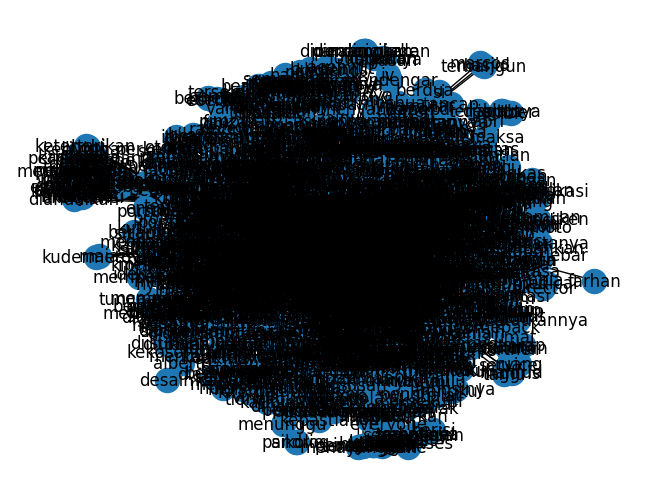

In [20]:
nx.draw(G,with_labels=True)